In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.cbook import boxplot_stats

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [ ]:
path = 'https://raw.githubusercontent.com/leomag/music-prediction/main/dataset.csv'

 - track_id: ID трека
 - artists: имена артистов
 - album_name: имя альбома
 - track_name: название трека
 - popularity: популярность трека от 0 до 100
 - duration_ms: длина трека в миллисекундах
 - explicit: есть ли я явно текст в треке
 - danceability: коэффициент танцевальности трека, значение 0.0 соответствует наименее танцевальному, а значение 1.0 наиболее танцевальному
 - energy: энергичность трека от 0,0 до 1,0 и представляет перцептивную меру интенсивности и активности
 - key: тональность, в которой находится трек, целые числа сопоставляются с высотой тональностью, используя стандартную нотацию Pitch Class. Например. 0 = C, 1 = C♯/D♭, 2 = D и так далее. Если key не обнаружен, значение равно -1.
 - loudness: общая громкость дорожки в децибелах (дБ)
 - mode: режим указывает модальность (мажор или минор) трека, тип гаммы, из которого получено его мелодическое содержание. Мажор представлен 1, а минор 0
 - speechiness: определяет наличие произнесенных слов в дорожке. Чем больше запись похожа на речь (например, ток-шоу, аудиокнига, поэзия), тем значение атрибута ближе к 1,0. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Значения от 0,33 до 0,66 описывают треки, которые могут содержать как музыку, так и речь, либо по частям, либо по слоям, включая такие случаи, как рэп. Значения ниже 0,33, скорее всего, представляют музыку и другие треки, не похожие на речь
 - acousticness: показатель достоверности того, что трек является акустическим от 0,0 до 1,0, где 1.0 означает высокую уверенность в том, что трек является акустическим
 - instrumentalness: предсказывает, содержит ли трек вокал. Звуки «ох» и «ааа» в этом контексте рассматриваются как инструментальные. Треки в стиле рэп или разговорные слова явно «вокальные». Чем ближе значение инструментальности к 1,0, тем больше вероятность того, что трек не содержит вокального содержания
 - liveness: определяет присутствие живого звука в записи. Более высокие значени представляют собой повышенную вероятность того, что трек был исполнен вживую. Значение выше 0,8 дает высокую вероятность того, что трек вживую исполнен
 - valence: мера от 0,0 до 1,0, описывающая музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфорические), а треки с низкой валентностью звучат более негативно (например, грустные, подавленные, злые)
 - tempo: общий предполагаемый темп дорожки в ударах в минуту (BPM). В музыкальной терминологии темп - это скорость или темп данного произведения, который напрямую зависит от duration
 - time_signature: предполагаемый тактовый размер. Тактовый размер - это условное обозначение, указывающее, сколько единиц в каждом такте. Тактовый размер варьируется от 3 до 7, что указывает на размер от 3/4 до 7/4
 - track_genre: жанр, к которому относится трек

In [ ]:
data = pd.read_csv(path, index_col='Unnamed: 0')

In [ ]:
data.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature track_genre  
0          0.000001    0.3580    0.715   87.917               4    acoustic  
1          0.000006    0.1010    0.267   77.489               4    acoustic  
2          0.000000    0.1170    0.120   76.332               4    acoustic  
3          0.000071    0.1320    0.143  181.740               3    acoustic  
4          0.000000    0.0829    0.167  119.949               4    acoustic

In [ ]:
data.tail(10)

track_id           artists  \
113990  2A4dSiJmbviL56CBupkh6C    Lucas Cervetti   
113991  0CE0Y6GM75cbrqao8EOAlW      Chris Tomlin   
113992  3FjOBB4EyIXHYUtSgrIdY9     Jesus Culture   
113993  4OkMK49i3NApR1KsAIsTf6      Chris Tomlin   
113994  4WbOUe6T0sozC7z5ZJgiAA    Lucas Cervetti   
113995  2C3TZjDRiAzdyViavDJ217     Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw     Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX     Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs  Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5     Cesária Evora   

                                               album_name  \
113990          Frecuencias Álmicas en 432hz (Solo Piano)   
113991                              The Ultimate Playlist   
113992                                   Revelation Songs   
113993                  See The Morning (Special Edition)   
113994                       Frecuencias Álmicas en 432hz   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                               track_name  popularity  duration_ms  explicit  \
113990  Frecuencia Álmica XI - Solo Piano          22       369049     False   
113991        At The Cross (Love Ran Red)          32       250629     False   
113992              Your Love Never Fails          38       312566     False   
113993        How Can I Keep From Singing          39       256026     False   
113994           Frecuencia Álmica, Pt. 4          22       305454     False   
113995                Sleep My Little Boy          21       384999     False   
113996                   Water Into Light          22       385000     False   
113997                     Miss Perfumado          22       271466     False   
113998                            Friends          41       283893     False   
113999                          Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
113990         0.579   0.245    4   -16.357     1       0.0384       0.97000   
113991         0.387   0.531    8    -4.788     1       0.0290       0.00305   
113992         0.475   0.860   10    -4.722     1       0.0421       0.00650   
113993         0.505   0.687   10    -4.375     1       0.0287       0.08410   
113994         0.331   0.171    1   -15.668     1       0.0350       0.92000   
113995         0.172   0.235    5   -16.393     1       0.0422       0.64000   
113996         0.174   0.117    0   -18.318     0       0.0401       0.99400   
113997         0.629   0.329    0   -10.895     0       0.0420       0.86700   
113998         0.587   0.506    7   -10.889     1       0.0297       0.38100   
113999         0.526   0.487    1   -10.204     0       0.0725       0.68100   

        instrumentalness  liveness  valence    tempo  time_signature  \
113990          0.924000    0.1010   0.3020  112.011               3   
113991          0.000000    0.2010   0.1530  146.003               4   
113992          0.000002    0.2460   0.4270  113.949               4   
113993          0.000000    0.1880   0.3820  104.083               3   
113994          0.022900    0.0679   0.3270  132.147               3   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700   0.4130  135.960               4   
113999          0.000000    0.0893   0.7080   79.198               4   

        track_genre  
113990  world-music  
113991  world-music  
113992  world-music  
113993  world-music  
113994  world-music  
113995  world-music  
113996  world-music  
113997  world-music  
113998  world-music  
11

In [ ]:
data.columns

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')

In [ ]:
data.shape

(114000, 20)

In [ ]:
data.dtypes


track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [ ]:
data.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Есть небольшое количество пропусков (artists, album_name, track_name)

In [ ]:
df = data.copy().dropna()

In [ ]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
num_cols = df.select_dtypes(exclude='object')
num_cols.shape

(113999, 15)

In [ ]:
num_cols.describe()

popularity   duration_ms   danceability         energy  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        5.309126      -8.258950       0.637558       0.084652   
std         3.559999       5.029357       0.480708       0.105733   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  113999.000000     113999.000000  113999.000000  113999.000000   
mean        0.314907          0.156051       0.213554       0.474066   
std         0.332522          0.309556       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.597500          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  113999.000000   113999.000000  
mean      122.147695        3.904034  
std        29.978290        0.432623  
min         0.000000        0.000000  
25%        99.218500        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [ ]:
cat_cols = df.select_dtypes(include='object')
cat_cols.head()

track_id                 artists  \
0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name track_genre  
0                      Comedy    acoustic  
1            Ghost - Acoustic    acoustic  
2              To Begin Again    acoustic  
3  Can't Help Falling In Love    acoustic  
4                     Hold On    acoustic

In [ ]:
cat_cols.describe()

track_id      artists                  album_name  \
count                   113999       113999                      113999   
unique                   89740        31437                       46589   
top     6S3JlDAGk3uu3NtZbPnuhS  The Beatles  Alternative Christmas 2022   
freq                         9          279                         195   

             track_name track_genre  
count            113999      113999  
unique            73608         114  
top     Run Rudolph Run    acoustic  
freq                151        1000

In [ ]:
# for c in cat_cols:
#     columnSeriesObj = cat_cols[c]
#     print(columnSeriesObj.values)

In [ ]:
cat_cols.loc[cat_cols.track_genre == 'world-music'].count()

track_id       1000
artists        1000
album_name     1000
track_name     1000
track_genre    1000
dtype: int64

In [ ]:
cat_cols.loc[cat_cols.track_genre == 'jazz'].count()

track_id       1000
artists        1000
album_name     1000
track_name     1000
track_genre    1000
dtype: int64

In [ ]:
cat_cols.loc[cat_cols.track_genre == 'children'].count()

track_id       1000
artists        1000
album_name     1000
track_name     1000
track_genre    1000
dtype: int64

Примерно выходит что каждого жанра по 1000.

Чтобы можно было с этим работать надо перевести объекты в числа.

In [ ]:
if 1:
    le = LabelEncoder()
    for c in cat_cols.columns:
        df[c] = le.fit_transform(cat_cols[c])
df.head()       

track_id  artists  album_name  track_name  popularity  duration_ms  \
0     62845    10357        8100       11741          73       230666   
1     55667     3287       14796       22528          55       149610   
2     19766    12397       39162       60774          57       210826   
3     77941    14839        8580        9580          71       201933   
4     68241     5255       16899       25689          82       198853   

   explicit  danceability  energy  key  loudness  mode  speechiness  \
0     False         0.676  0.4610    1    -6.746     0       0.1430   
1     False         0.420  0.1660    1   -17.235     1       0.0763   
2     False         0.438  0.3590    0    -9.734     1       0.0557   
3     False         0.266  0.0596    0   -18.515     1       0.0363   
4     False         0.618  0.4430    2    -9.681     1       0.0526   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0        0.0322          0.000001    0.3580    0.715   87.917               4   
1        0.9240          0.000006    0.1010    0.267   77.489               4   
2        0.2100          0.000000    0.1170    0.120   76.332               4   
3        0.9050          0.000071    0.1320    0.143  181.740               3   
4        0.4690          0.000000    0.0829    0.167  119.949               4   

   track_genre  
0            0  
1            0  
2            0  
3            0  
4            0

In [ ]:
df = df.drop('explicit', axis=1)

In [ ]:
df.head()

track_id  artists  album_name  track_name  popularity  duration_ms  \
0     62845    10357        8100       11741          73       230666   
1     55667     3287       14796       22528          55       149610   
2     19766    12397       39162       60774          57       210826   
3     77941    14839        8580        9580          71       201933   
4     68241     5255       16899       25689          82       198853   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4            0  
1          0.000006    0.1010    0.267   77.489               4            0  
2          0.000000    0.1170    0.120   76.332               4            0  
3          0.000071    0.1320    0.143  181.740               3            0  
4          0.000000    0.0829    0.167  119.949               4            0

In [ ]:
num_cols = df.select_dtypes(exclude='object')
num_cols.shape
num_cols.describe()

track_id        artists    album_name     track_name  \
count  113999.000000  113999.000000  113999.00000  113999.000000   
mean    44861.739235   15749.375626   22548.64633   36443.501145   
std     25924.195201    9077.699993   13442.41065   20933.210685   
min         0.000000       0.000000       0.00000       0.000000   
25%     22414.500000    7988.000000   10945.50000   18638.500000   
50%     44886.000000   15609.000000   22406.00000   36216.000000   
75%     67265.500000   23619.000000   34063.00000   54390.500000   
max     89739.000000   31436.000000   46588.00000   73607.000000   

          popularity   duration_ms   danceability         energy  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        5.309126      -8.258950       0.637558       0.084652   
std         3.559999       5.029357       0.480708       0.105733   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  113999.000000     113999.000000  113999.000000  113999.000000   
mean        0.314907          0.156051       0.213554       0.474066   
std         0.332522          0.309556       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.597500          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature    track_genre  
count  113999.000000   113999.000000  113999.000000  
mean      122.147695        3.904034      56.499925  
std        29.978290        0.432623      32.907978  
min         0.000000        0.000000       0.000000  
25%        99.218500        4.000000      28.000000  
50%       122.017000        4.000000      56.000000  
75%       140.071000        4.000000      85.000000  
max       243.372000        5.000000     113.000000

In [ ]:
df_class = df['track_genre']

In [ ]:
df_class.describe

<bound method NDFrame.describe of 0           0
1           0
2           0
3           0
4           0
         ... 
113995    113
113996    113
113997    113
113998    113
113999    113
Name: track_genre, Length: 113999, dtype: int64>

In [ ]:
df.describe()

track_id        artists    album_name     track_name  \
count  113999.000000  113999.000000  113999.00000  113999.000000   
mean    44861.739235   15749.375626   22548.64633   36443.501145   
std     25924.195201    9077.699993   13442.41065   20933.210685   
min         0.000000       0.000000       0.00000       0.000000   
25%     22414.500000    7988.000000   10945.50000   18638.500000   
50%     44886.000000   15609.000000   22406.00000   36216.000000   
75%     67265.500000   23619.000000   34063.00000   54390.500000   
max     89739.000000   31436.000000   46588.00000   73607.000000   

          popularity   duration_ms   danceability         energy  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        5.309126      -8.258950       0.637558       0.084652   
std         3.559999       5.029357       0.480708       0.105733   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  113999.000000     113999.000000  113999.000000  113999.000000   
mean        0.314907          0.156051       0.213554       0.474066   
std         0.332522          0.309556       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.597500          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature    track_genre  
count  113999.000000   113999.000000  113999.000000  
mean      122.147695        3.904034      56.499925  
std        29.978290        0.432623      32.907978  
min         0.000000        0.000000       0.000000  
25%        99.218500        4.000000      28.000000  
50%       122.017000        4.000000      56.000000  
75%       140.071000        4.000000      85.000000  
max       243.372000        5.000000     113.000000

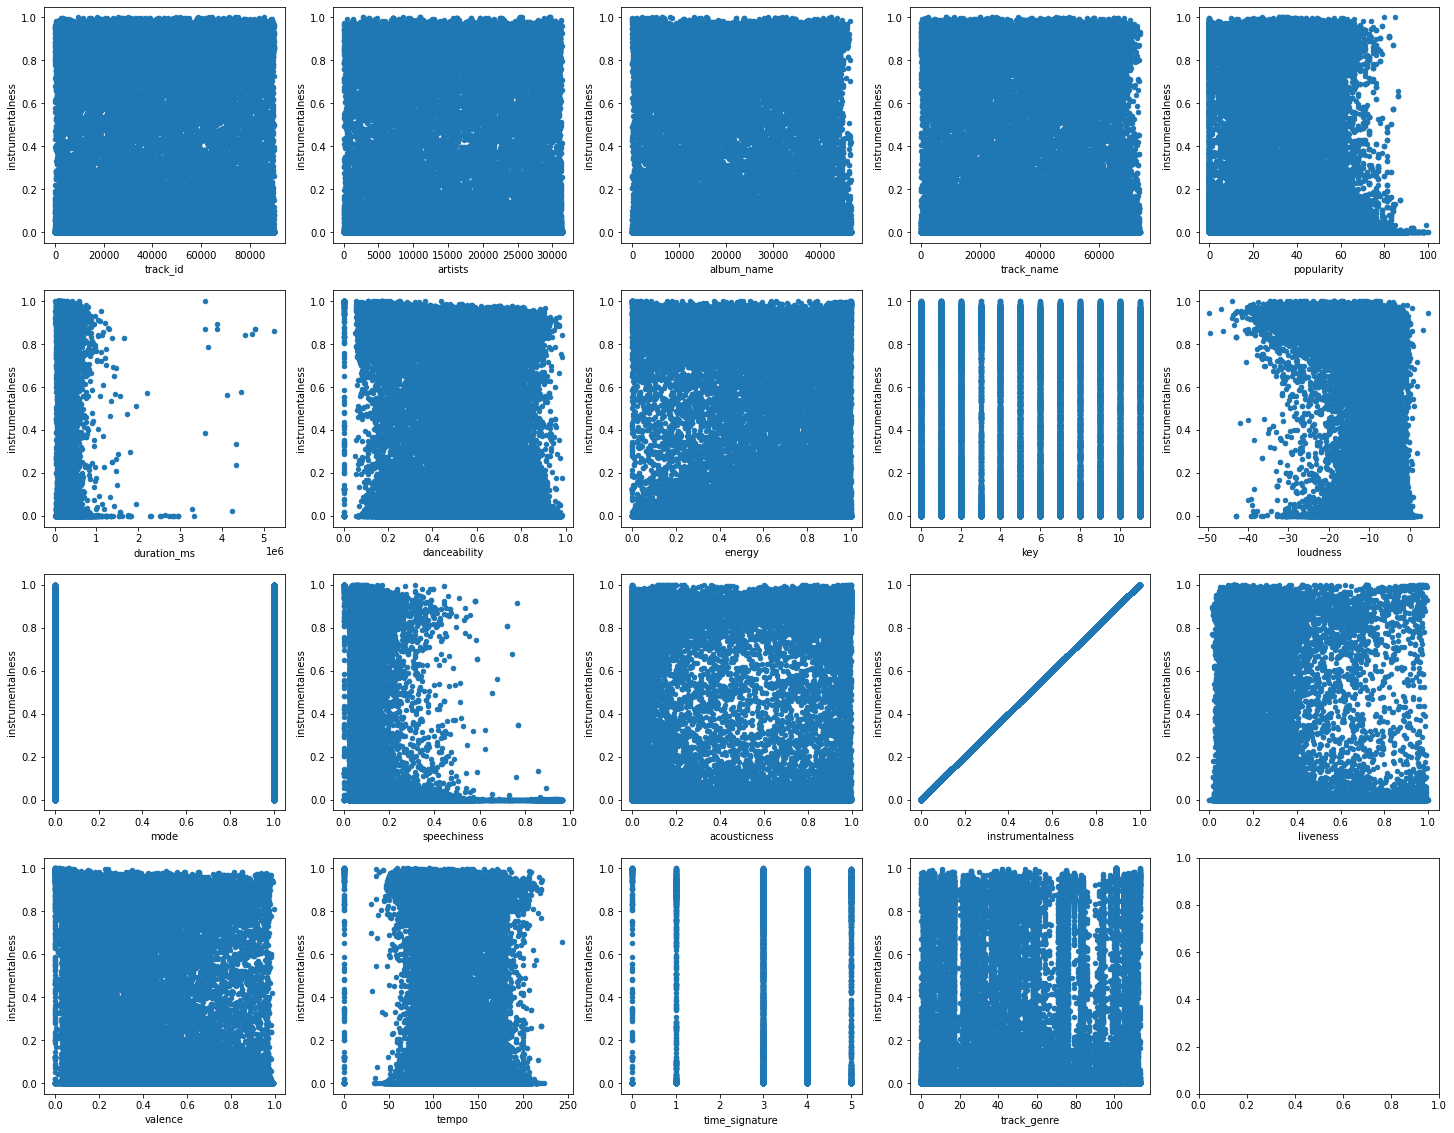

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "instrumentalness", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

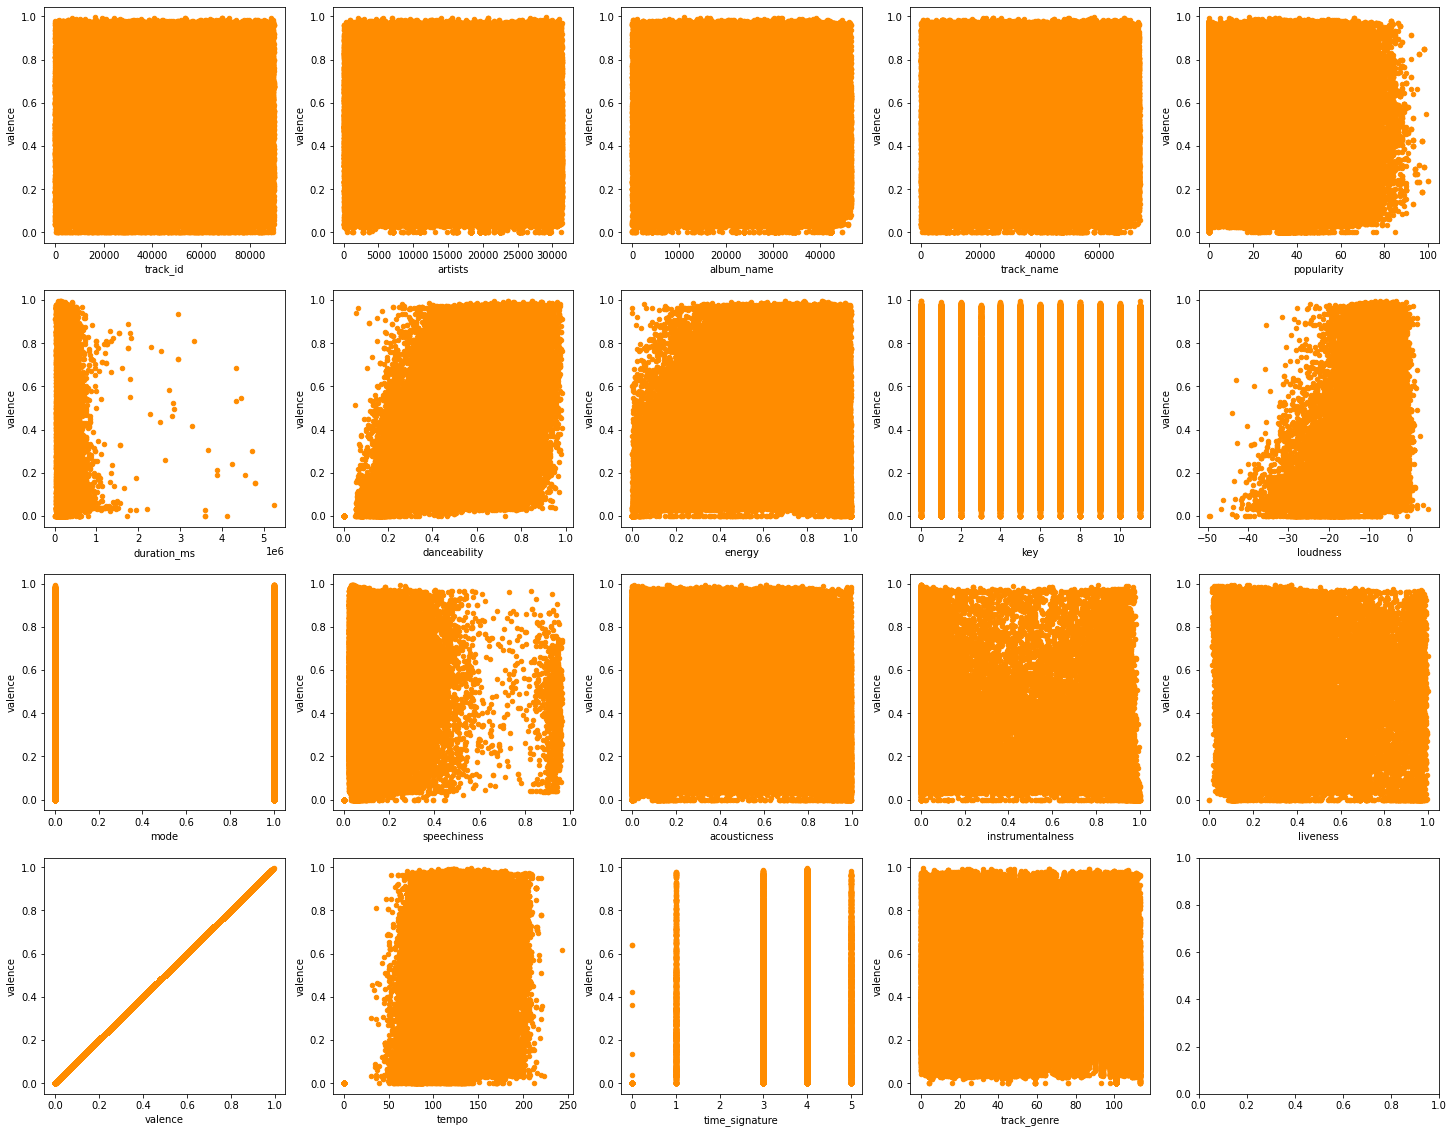

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(25, 20))
for idx, feature in enumerate(df.columns):
    df.plot(feature, "valence", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5], color='darkorange')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

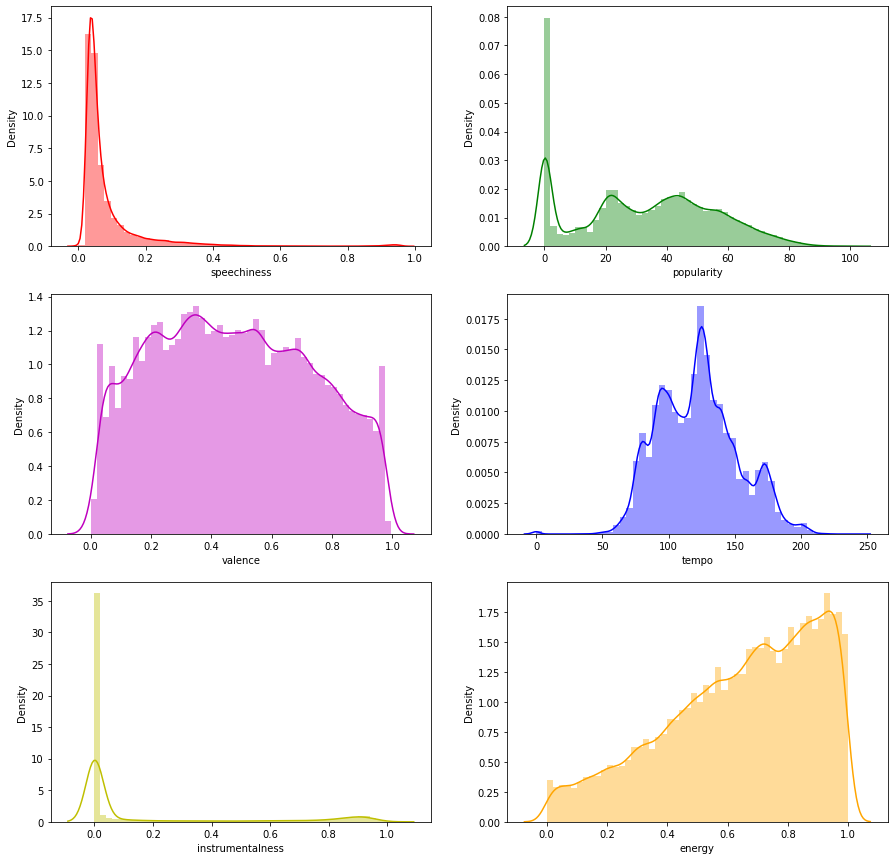

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(df['speechiness'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df['popularity'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df['valence'], bins=50, color='m', ax=axes[1, 0])
sns.distplot(df['tempo'], bins=50, color='b', ax=axes[1, 1])
sns.distplot(df['instrumentalness'], bins=50, color='y', ax=axes[2, 0])
sns.distplot(df['energy'], bins=50, color='orange', ax=axes[2, 1])

In [ ]:
data[data['tempo'] > 200]

track_id                           artists  \
32      1m5LC29RE52Bxy7hxvpOlL                  Chord Overstreet   
384     63wsZUhUZLlh1OsyrZq7sz         Boyce Avenue;Kina Grannis   
415     3m0jiOJfxIqGGsRKMOA2uQ                       Canyon City   
519     6cMzeng5QA8fd2qqiMeIyg                       Jonah Baker   
561     2dMkrhsWFVP2rHZmTEKkeh                       Mat Kearney   
...                        ...                               ...   
111882  4Bl3dXjJRYUBmlsA6pCpQR  Wax Tailor;Aloe Blacc;DJ Nu-Mark   
111908  25G1w3E4OMrovtPE5F510g                        Portishead   
112370  43f3oGrYrjcB06aNPVXH2T                     Evgeny Grinko   
112893  2cqFcmV1cnzyriLe4gbkju                         Umut Kaya   
113866  5jI9fVQ1QqUygoNpVRdzu3                      Phil Wickham   

                                               album_name  \
32                           Christmas Country Songs 2022   
384                                Cover Sessions, Vol. 2   
415                                             Wish List   
519     Running Up That Hill (A Deal With God) [Acoustic]   
561                                             CRAZYTALK   
...                                                   ...   
111882                                  B-Sides & Remixes   
111908                                         Portishead   
112370                                           Outtakes   
112893                                          Umut Kaya   
113866                                          Christmas   

                                               track_name  popularity  \
32            All I Want For Christmas Is A Real Good Tan           0   
384                                              Fast Car          61   
415                                             Wish List          46   
519     Running Up That Hill (A Deal With God) - Acoustic          51   
561                                            Wanted Man          59   
...                                                   ...         ...   
111882                      Time To Go - DJ Nu-Mark Remix          18   
111908                                           Undenied          46   
112370                                       Wind Brought          61   
112893                     Ver O Güzel Gözlerinden Birini          37   
113866                            This Year for Christmas          30   

        duration_ms  explicit  danceability  energy  key  loudness  mode  \
32           234186     False         0.593  0.4550    6    -8.192     1   
384          304293     False         0.392  0.2510   10    -9.845     1   
415          212760     False         0.307  0.1100    1   -15.253     1   
519          168042     False         0.385  0.1340    5   -14.672     0   
561          235106     False         0.514  0.3190    3    -8.978     1   
...             ...       ...           ...     ...  ...       ...   ...   
111882       214784     False         0.565  0.7650    4    -5.252     0   
111908       260026     False         0.241  0.2810    0    -8.726     1   
112370        84948     False         0.282  0.0663    0   -24.072     0   
112893       215016     False         0.360  0.7440    1    -5.941     0   
113866       210161     False         0.365  0.4870    9    -6.523     1   

        speechiness  acousticness  instrumentalness  liveness  valence  \
32           0.0388        0.3660          0.000000    0.0914   0.5640   
384          0.0363        0.8070          0.000000    0.0797   0.5080   
415          0.0388        0.7330          0.000006    0.1110   0.3200   
519          0.0476        0.8990          0.000000    0.1130   0.4270   
561          0.0941        0.8050          0.000000    0.2110   0.6770   
...             ...           ...               ...       ...      ...   
111882       0.0691        0.0163          0.000273    0.0524   0.7310   
111908       0.0416        0.4500          0.000007    0.0937   0.0321   
112370       0.0

Можно сделать заключение что у песен сразу много жанров и различные числовые параметры не говорят, что та или иная песня точно такого жанра.

In [ ]:
import plotly.express as px

In [ ]:
data = data.copy().dropna()
data.describe()

popularity   duration_ms   danceability         energy  \
count  113999.000000  1.139990e+05  113999.000000  113999.000000   
mean       33.238827  2.280312e+05       0.566801       0.641383   
std        22.304959  1.072961e+05       0.173543       0.251530   
min         0.000000  8.586000e+03       0.000000       0.000000   
25%        17.000000  1.740660e+05       0.456000       0.472000   
50%        35.000000  2.129060e+05       0.580000       0.685000   
75%        50.000000  2.615060e+05       0.695000       0.854000   
max       100.000000  5.237295e+06       0.985000       1.000000   

                 key       loudness           mode    speechiness  \
count  113999.000000  113999.000000  113999.000000  113999.000000   
mean        5.309126      -8.258950       0.637558       0.084652   
std         3.559999       5.029357       0.480708       0.105733   
min         0.000000     -49.531000       0.000000       0.000000   
25%         2.000000     -10.013000       0.000000       0.035900   
50%         5.000000      -7.004000       1.000000       0.048900   
75%         8.000000      -5.003000       1.000000       0.084500   
max        11.000000       4.532000       1.000000       0.965000   

        acousticness  instrumentalness       liveness        valence  \
count  113999.000000     113999.000000  113999.000000  113999.000000   
mean        0.314907          0.156051       0.213554       0.474066   
std         0.332522          0.309556       0.190378       0.259261   
min         0.000000          0.000000       0.000000       0.000000   
25%         0.016900          0.000000       0.098000       0.260000   
50%         0.169000          0.000042       0.132000       0.464000   
75%         0.597500          0.049000       0.273000       0.683000   
max         0.996000          1.000000       1.000000       0.995000   

               tempo  time_signature  
count  113999.000000   113999.000000  
mean      122.147695        3.904034  
std        29.978290        0.432623  
min         0.000000        0.000000  
25%        99.218500        4.000000  
50%       122.017000        4.000000  
75%       140.071000        4.000000  
max       243.372000        5.000000

In [ ]:
df.head()

track_id  artists  album_name  track_name  popularity  duration_ms  \
0     62845    10357        8100       11741          73       230666   
1     55667     3287       14796       22528          55       149610   
2     19766    12397       39162       60774          57       210826   
3     77941    14839        8580        9580          71       201933   
4     68241     5255       16899       25689          82       198853   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1         0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2         0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3         0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4         0.618  0.4430    2    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4            0  
1          0.000006    0.1010    0.267   77.489               4            0  
2          0.000000    0.1170    0.120   76.332               4            0  
3          0.000071    0.1320    0.143  181.740               3            0  
4          0.000000    0.0829    0.167  119.949               4            0

In [ ]:
df = pd.DataFrame(dict(
    energy = df.energy,
    genre = df.track_genre,
    speechiness = df.speechiness))

fig = px.funnel(df, x='energy', y='genre', color='speechiness')
fig.show()

In [ ]:
# fig = px.scatter(x=data.track_genre=='jazz', y=df.track_name)
# fig.show()

fig = px.scatter(x=data.track_genre, y=data.danceability)
fig.show()

Танцевать, возможно, если жанр ambient, guitar, jazz, opera, romance, show-tunes, sleep, world-musiс не стоит :)